In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re as re
import datetime as dt



# Ayiti Analytics Data Processing Bootcamp
  Ayiti Analytics Data wants to expand its training centers throughout all the communes of the country. Your role as a data analyst is to help them realize this dream.

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students
 
* How many applications must be made to select 25% women for each on average

* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection
 
* What is the average number of university students who should participate in this program
* What will be the average number of applications per week that we could have
* How many weeks should we extend the application process to select 60 students per commune?
* If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time
* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

### NB 
Use the same framework of the BA project to complete this project


## Data cleansing


In [99]:
# for uploading the files
commune=pd.read_excel(r"commune.xlsx")
enroll = pd.read_csv(r"enroll.csv")
quest = pd.read_csv(r"quest.csv")
industry = pd.read_csv(r"industry.csv")
ord = pd.read_csv(r"ord.csv")
study_domain = pd.read_csv(r"study_domain.csv")
transaction = pd.read_csv(r"transaction.csv")
technology = pd.read_csv(r"technology.csv")

In [6]:
#to remove duplicated values
df_study_domain = pd.get_dummies(data=study_domain[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
df_study_domain.head()

,key,quest_id,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other
0,other,905ddcf2-ce95-11eb-9a92-7c67a234f601,0,0,0,0,0,0,0,0,1
1,item1,905e4cf5-ce95-11eb-96a9-7c67a234f601,0,1,0,0,0,0,0,0,0
2,item6,905e4cf5-ce95-11eb-96a9-7c67a234f601,0,0,0,0,0,1,0,0,0
3,other,905e73fd-ce95-11eb-a7b0-7c67a234f601,0,0,0,0,0,0,0,0,1
4,other,905e9b27-ce95-11eb-9c37-7c67a234f601,0,0,0,0,0,0,0,0,1


In [7]:
# grouping by quest_id category and apply the sumrize function
df_study_domain1 = df_study_domain.groupby("quest_id").sum()
df_study_domain1.head(2)
print(df_study_domain1.shape)

(244, 9)


In [8]:
#to remove duplicated values
df_technology = pd.get_dummies(technology[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
df_technology1 = df_technology.groupby("quest_id").sum()
df_technology1.head(2)

,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other
quest_id,,,,,,,,,,,,
905ddcf2-ce95-11eb-9a92-7c67a234f601,0,1,0,0,0,0,0,0,1,0,0,0
905e2608-ce95-11eb-809f-7c67a234f601,1,1,1,1,1,0,0,1,0,1,0,0


In [9]:
#to remove duplicated values
df_industry = pd.get_dummies(data=industry[["key", "quest_id", "values"]], columns=['values'], prefix="", prefix_sep="")
df_industry1 = df_industry.groupby("quest_id").sum()
df_industry1.head()
print(df_industry1.shape)

(246, 14)


In [10]:
quest.head(2)

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id
0,0,male,25/08/1998,ht0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601
1,1,female,29/09/1996,ht0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601


In [11]:
# to merge quest dataframe with enroll dataframe
df_result=pd.merge(left=quest, right=enroll, how = 'left',on='quest_id')
df_result.head(5)

,Unnamed: 0_x,gender,dob,commune,created_at_x,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Unnamed: 0_y,created_at_y,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at
0,0,male,25/08/1998,ht0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,17.0,2021-02-14T23:15:19.500Z,NaN,39726355.0,Entwodiksyon Nan Syans Done,1047613.0,0.000000,NaN,False,True,False,2021-02-17T08:43:53.457Z,NaN,2021-02-17T08:44:09.561Z
1,1,female,29/09/1996,ht0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,male,17/05/1996,ht0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,ht01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],No,unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601,67.0,2021-02-20T21:20:37.450Z,2071-02-19T23:00:15.000Z,40117659.0,Entwodiksyon Nan Syans Done,1047613.0,0.325581,NaN,False,False,False,2021-02-20T21:20:37.814Z,2021-03-03T23:00:11.000Z,2021-03-09T13:57:49.729Z
3,3,male,24/11/1996,ht0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,ht01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,male,20/07/1997,ht0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,ht01,High School (16 years),unknown,['other'],No,unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# to merge two dataframes by left method
df_result1=pd.merge(left=df_result, right=df_study_domain1, how = 'left',on='quest_id')
df_result2=pd.merge(left=df_result1, right=df_technology1, how = 'left',on='quest_id')
df_result3=pd.merge(left=df_result2, right=df_industry1, how = 'left',on='quest_id')
df_result3.head(2)

,Unnamed: 0_x,gender,dob,commune,created_at_x,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Unnamed: 0_y,created_at_y,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other_x,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Communications,Consulting,Education,Energy,Finance,Healthcare,Insurance,Manufacturing,Marketing,Public Sector/ Non-Profit Agencies,Retail/ E-Commerce,Technology (Software/ Internet),Transportation,other
0,0,male,25/08/1998,ht0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,17.0,2021-02-14T23:15:19.500Z,NaN,39726355.0,Entwodiksyon Nan Syans Done,1047613.0,0.0,NaN,False,True,False,2021-02-17T08:43:53.457Z,NaN,2021-02-17T08:44:09.561Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,female,29/09/1996,ht0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#select commune_id column and transform it to sting lower 
commune["Commune_Id"] = commune["Commune_Id"].str.lower()
commune["ADM1_PCODE"] = commune["ADM1_PCODE"].str.lower()
commune.head(2)

,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,Abricots,Abricots,ht0812,Grande'Anse,ht08
1,Acul du Nord,Acul du Nord,ht0321,North,ht03


In [14]:
# Give another name to the Comune_id column
commune.rename(columns = {"Commune_Id": "commune"}, inplace = True)
commune.head(2)

,Commune_en,Commune_FR,commune,Departement,ADM1_PCODE
0,Abricots,Abricots,ht0812,Grande'Anse,ht08
1,Acul du Nord,Acul du Nord,ht0321,North,ht03


In [15]:
# Merge df_result3 dataframe to the commune dataframe and taking only three columns
df_result4=pd.merge(left=df_result3, right=commune[["Commune_FR","Departement", "commune"]], how = 'left',on='commune')
df_result4.head(2)

,Unnamed: 0_x,gender,dob,commune,created_at_x,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id,Unnamed: 0_y,created_at_y,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,Accounting,Computer Science,Economics,Electrical Engineering,Law,Management,Medicine,Statistics,other_x,Bash,Excel,Git,Java,JavaScript,PHP,PowerBI or Tableau,Python,R,SQL,VBA,other_y,Communications,Consulting,Education,Energy,Finance,Healthcare,Insurance,Manufacturing,Marketing,Public Sector/ Non-Profit Agencies,Retail/ E-Commerce,Technology (Software/ Internet),Transportation,other,Commune_FR,Departement
0,0,male,25/08/1998,ht0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,17.0,2021-02-14T23:15:19.500Z,NaN,39726355.0,Entwodiksyon Nan Syans Done,1047613.0,0.0,NaN,False,True,False,2021-02-17T08:43:53.457Z,NaN,2021-02-17T08:44:09.561Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Port-au-Prince,West
1,1,female,29/09/1996,ht0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Port-au-Prince,West


In [16]:
# delete the ten last string in the created_at_x column
df_result4["created_at_x"] = df_result4["created_at_x"].str[:10]


In [17]:
# display two lines in the ord dataframe
ord.head(2)

,Unnamed: 0,created_at,user_id,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id
0,0,2021-03-14T15:34:35.014Z,41587952,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906b3c86-ce95-11eb-b6a7-7c67a234f601
1,1,2021-03-14T04:20:23.483Z,41564742,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906636cf-ce95-11eb-8679-7c67a234f601


In [18]:
#display two lines in the transaction dataframe
transaction.head(2)

,Column1,created_at,modified_at,user_id,course_id,transaction_id
0,0,2021-03-08T05:08:50.832Z,2021-03-08T05:08:50.832Z,40976440,1047613,4641281952
1,1,2021-03-08T17:26:35.841Z,2021-03-08T17:26:35.841Z,41179271,1047613,4644270160


In [19]:
# Concataned two dataframes on columns and display the dataframe
df_result5=pd.concat([transaction,ord],axis=0)
df_result5


,Column1,created_at,modified_at,user_id,course_id,transaction_id,Unnamed: 0,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id
0,0.0,2021-03-08T05:08:50.832Z,2021-03-08T05:08:50.832Z,40976440,1047613.0,4.641282e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2021-03-08T17:26:35.841Z,2021-03-08T17:26:35.841Z,41179271,1047613.0,4.644270e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,2021-03-08T18:52:09.147Z,2021-03-08T18:52:09.147Z,40973512,1047613.0,4.645071e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,2021-03-08T19:06:32.837Z,2021-03-08T19:06:32.837Z,41177453,1047613.0,4.645209e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,2021-03-08T22:10:00.796Z,2021-03-08T22:10:00.796Z,40797121,1047613.0,4.646815e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,NaN,2021-02-18T14:45:02.292Z,NaN,39908510,NaN,NaN,13.0,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,905f5dc1-ce95-11eb-bfa7-7c67a234f601
14,NaN,2021-02-17T13:48:38.371Z,NaN,39903501,NaN,NaN,14.0,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,NaN
15,NaN,2021-02-17T11:08:54.385Z,NaN,39896120,NaN,NaN,15.0,Entwodiksyon Nan Syans Done,1100636.0,0.0,0.0,False,bootcamp_enroll,6452874.0,NaN,Complete,9062b754-ce95-11eb-b31e-7c67a234f601
16,NaN,2021-02-16T20:09:31.627Z,NaN,39856539,NaN,NaN,16.0,Entwodiksyon Nan Syans Done,1100636.0,20.0,2000.0,False,NaN,NaN,NaN,Complete,9069789f-ce95-11eb-9788-7c67a234f601


In [20]:
# Delete some columns in df_result5 dataframe
df_result5.drop(["Column1","Unnamed: 0","course_id","status","product_name","product_id",	"amount_cents",	"subscription",	"coupon_code",	"coupon_id",	"affiliate_referral_code"], axis="columns",inplace=True)


In [21]:
# display df_result5
df_result5

,created_at,modified_at,user_id,transaction_id,amount_dollars,quest_id
0,2021-03-08T05:08:50.832Z,2021-03-08T05:08:50.832Z,40976440,4.641282e+09,NaN,NaN
1,2021-03-08T17:26:35.841Z,2021-03-08T17:26:35.841Z,41179271,4.644270e+09,NaN,NaN
2,2021-03-08T18:52:09.147Z,2021-03-08T18:52:09.147Z,40973512,4.645071e+09,NaN,NaN
3,2021-03-08T19:06:32.837Z,2021-03-08T19:06:32.837Z,41177453,4.645209e+09,NaN,NaN
4,2021-03-08T22:10:00.796Z,2021-03-08T22:10:00.796Z,40797121,4.646815e+09,NaN,NaN
...,...,...,...,...,...,...
13,2021-02-18T14:45:02.292Z,NaN,39908510,NaN,20.0,905f5dc1-ce95-11eb-bfa7-7c67a234f601
14,2021-02-17T13:48:38.371Z,NaN,39903501,NaN,20.0,NaN
15,2021-02-17T11:08:54.385Z,NaN,39896120,NaN,0.0,9062b754-ce95-11eb-b31e-7c67a234f601
16,2021-02-16T20:09:31.627Z,NaN,39856539,NaN,20.0,9069789f-ce95-11eb-9788-7c67a234f601


In [22]:
# Select the mentionned columns of df_result4 by loc process
df_result4=df_result4.loc[:,["gender","dob","created_at_x","education_level","have_computer_home",
                 "internet_at_home","hear_AA_1","quest_id","course_name","Commune_FR","Departement"]]



In [23]:
# merge Two dataframes
df_result6=pd.merge(left=df_result4, right=df_result5 , how="left", on= "quest_id")

In [24]:
# display df_result6 dataframe
df_result6

,gender,dob,created_at_x,education_level,have_computer_home,internet_at_home,hear_AA_1,quest_id,course_name,Commune_FR,Departement,created_at,modified_at,user_id,transaction_id,amount_dollars
0,male,25/08/1998,2021-02-14,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,Entwodiksyon Nan Syans Done,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN
1,female,29/09/1996,2021-02-16,Bachelors (bacc +4),Yes,Yes,Friend,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN
2,male,17/05/1996,2021-02-16,Bachelors (bacc +4),Yes,Yes,Friend,905e2608-ce95-11eb-809f-7c67a234f601,Entwodiksyon Nan Syans Done,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN
3,male,24/11/1996,2021-02-16,Bachelors (bacc +4),Yes,Yes,ESIH,905e4cf5-ce95-11eb-96a9-7c67a234f601,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN
4,male,20/07/1997,2021-02-16,High School (16 years),Yes,Yes,WhatsApp,905e73fd-ce95-11eb-a7b0-7c67a234f601,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,male,15/02/1994,2021-03-02,Bachelors (bacc +4),Yes,Yes,Facebook,906b3c84-ce95-11eb-8c2a-7c67a234f601,Entwodiksyon Nan Syans Done,Mirebalais,Centre,NaN,NaN,NaN,NaN,NaN
246,male,08/10/1990,2021-03-10,Bachelors (bacc +4),Yes,Yes,Friend,906b3c85-ce95-11eb-9b87-7c67a234f601,NaN,Mirebalais,Centre,NaN,NaN,NaN,NaN,NaN
247,male,28/12/1993,2021-03-14,Bachelors (bacc +4),Yes,Yes,Friend,906b3c86-ce95-11eb-b6a7-7c67a234f601,Entwodiksyon Nan Syans Done,Mirebalais,Centre,2021-03-14T15:34:35.014Z,NaN,41587952.0,NaN,20.0
248,male,17/04/1992,2021-03-08,Bachelors (bacc +4),Yes,Yes,Facebook,906b65e2-ce95-11eb-8b5c-7c67a234f601,Entwodiksyon Nan Syans Done,Ferrier,North-East,NaN,NaN,NaN,NaN,NaN


In [25]:
# select dob colums in df_result6 and replace the first date by the second
df_result6["dob"].replace({'3 aout 1977': '03/08/1977'}, inplace=True)
#df_result6[df_result6["dob"]== '3 aout 1977']
#print(df_result6.iloc[10:20])

In [26]:
#convert dob string in datetime
df_result6["dob"] = pd.to_datetime(df_result6["dob"])

In [27]:
# convert created_at_x in to datetime
df_result6["created_at_x"] = pd.to_datetime(df_result6["created_at_x"])
df_result6

,gender,dob,created_at_x,education_level,have_computer_home,internet_at_home,hear_AA_1,quest_id,course_name,Commune_FR,Departement,created_at,modified_at,user_id,transaction_id,amount_dollars
0,male,1998-08-25,2021-02-14,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,Entwodiksyon Nan Syans Done,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN
1,female,1996-09-29,2021-02-16,Bachelors (bacc +4),Yes,Yes,Friend,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN
2,male,1996-05-17,2021-02-16,Bachelors (bacc +4),Yes,Yes,Friend,905e2608-ce95-11eb-809f-7c67a234f601,Entwodiksyon Nan Syans Done,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN
3,male,1996-11-24,2021-02-16,Bachelors (bacc +4),Yes,Yes,ESIH,905e4cf5-ce95-11eb-96a9-7c67a234f601,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN
4,male,1997-07-20,2021-02-16,High School (16 years),Yes,Yes,WhatsApp,905e73fd-ce95-11eb-a7b0-7c67a234f601,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,male,1994-02-15,2021-03-02,Bachelors (bacc +4),Yes,Yes,Facebook,906b3c84-ce95-11eb-8c2a-7c67a234f601,Entwodiksyon Nan Syans Done,Mirebalais,Centre,NaN,NaN,NaN,NaN,NaN
246,male,1990-08-10,2021-03-10,Bachelors (bacc +4),Yes,Yes,Friend,906b3c85-ce95-11eb-9b87-7c67a234f601,NaN,Mirebalais,Centre,NaN,NaN,NaN,NaN,NaN
247,male,1993-12-28,2021-03-14,Bachelors (bacc +4),Yes,Yes,Friend,906b3c86-ce95-11eb-b6a7-7c67a234f601,Entwodiksyon Nan Syans Done,Mirebalais,Centre,2021-03-14T15:34:35.014Z,NaN,41587952.0,NaN,20.0
248,male,1992-04-17,2021-03-08,Bachelors (bacc +4),Yes,Yes,Facebook,906b65e2-ce95-11eb-8b5c-7c67a234f601,Entwodiksyon Nan Syans Done,Ferrier,North-East,NaN,NaN,NaN,NaN,NaN


In [28]:
# create a new colum age in df_result6, do a difference between created_at_x value and dob 
df_result6["age"]=df_result6["created_at_x"]-df_result6["dob"]
# convert the age which was in day into year
df_result6["age"]=df_result6["age"]//365
# delete the two last number in age by the lambda function
df_result6["age"] = df_result6["age"].apply(lambda x: str(x)[:2])
# display df_result6
df_result6.head()

,gender,dob,created_at_x,education_level,have_computer_home,internet_at_home,hear_AA_1,quest_id,course_name,Commune_FR,Departement,created_at,modified_at,user_id,transaction_id,amount_dollars,age
0,male,1998-08-25,2021-02-14,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,Entwodiksyon Nan Syans Done,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,22
1,female,1996-09-29,2021-02-16,Bachelors (bacc +4),Yes,Yes,Friend,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,24
2,male,1996-05-17,2021-02-16,Bachelors (bacc +4),Yes,Yes,Friend,905e2608-ce95-11eb-809f-7c67a234f601,Entwodiksyon Nan Syans Done,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,24
3,male,1996-11-24,2021-02-16,Bachelors (bacc +4),Yes,Yes,ESIH,905e4cf5-ce95-11eb-96a9-7c67a234f601,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,24
4,male,1997-07-20,2021-02-16,High School (16 years),Yes,Yes,WhatsApp,905e73fd-ce95-11eb-a7b0-7c67a234f601,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,23


In [29]:
# rename all the colum selected into df_result6
df_result6 = df_result6.rename(columns={"created_at_x":"Registration_date","amount_dollars":"Payed_by_card","transaction_id":"payed_by_moncash"})

In [30]:
# display the two first line in df_result6 
df_result6.head(2)

,gender,dob,Registration_date,education_level,have_computer_home,internet_at_home,hear_AA_1,quest_id,course_name,Commune_FR,Departement,created_at,modified_at,user_id,payed_by_moncash,Payed_by_card,age
0,male,1998-08-25,2021-02-14,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601,Entwodiksyon Nan Syans Done,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,22
1,female,1996-09-29,2021-02-16,Bachelors (bacc +4),Yes,Yes,Friend,905ddcf2-ce95-11eb-9a92-7c67a234f601,NaN,Port-au-Prince,West,NaN,NaN,NaN,NaN,NaN,24


In [31]:
# display all information about the columns of df_result6
df_result6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   gender              250 non-null    object        
 1   dob                 244 non-null    datetime64[ns]
 2   Registration_date   250 non-null    datetime64[ns]
 3   education_level     250 non-null    object        
 4   have_computer_home  250 non-null    object        
 5   internet_at_home    250 non-null    object        
 6   hear_AA_1           250 non-null    object        
 7   quest_id            250 non-null    object        
 8   course_name         102 non-null    object        
 9   Commune_FR          250 non-null    object        
 10  Departement         250 non-null    object        
 11  created_at          14 non-null     object        
 12  modified_at         0 non-null      object        
 13  user_id             14 non-null     float64       

In [32]:
# display the some of values of each column
values = df_result6.isna().sum()
values

gender                  0
dob                     6
Registration_date       0
education_level         0
have_computer_home      0
internet_at_home        0
hear_AA_1               0
quest_id                0
course_name           148
Commune_FR              0
Departement             0
created_at            236
modified_at           250
user_id               236
payed_by_moncash      250
Payed_by_card         236
age                     0
dtype: int64

## Data Processing

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students


In [33]:
# function to do a barchat graph
def generate_barchart(data="", title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6),horizontal=""):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    
    axes.text(i,
              tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    
    axes.text(i,
              tot+3,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    i+=1
  plt.title(title)
  plt.show()


In [34]:
# kakile frekans absoli ak frekans relativ yon varyab kategorik
def graf(data,col="", abs_value ="Total",rel_value ="Percent",show_plot=False, title="",figsize=""):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]
   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1)
   else:
     result = pd.concat([res1,res2],axis=1)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =(10,6))
     return result







In [35]:
#function pivot table to to the pivot on the quest_id values on the commune_FR and fill zero in the nan value
def pivot(y):
  pivo=pd.pivot_table(df_result6, values='quest_id', index=['Commune_FR'], columns=y,aggfunc='count')
  pivo=pivo.fillna(0)
    #new_pivot.drop(["unkwown", "other", "Other"],axis=1, inplace=True)
  return pivo

In [36]:
# nunique function return number of unique elements in the object and display them in ascending order
registration_per_commune=df_result6.groupby("Commune_FR")["quest_id"].nunique().sort_values(ascending=False).to_frame()
registration_per_commune



,quest_id
Commune_FR,
Delmas,71
Port-au-Prince,59
Pétion-Ville,29
Carrefour,23
Tabarre,11
Croix-Des-Bouquets,10
Cap-Haïtien,5
Saint-Marc,4
Jacmel,3


In [100]:
# count the values in commune_fr put them in a frame
commune_total = df_result6.Commune_FR.value_counts(normalize=False).to_frame()
# display commune totale 1  in the ascending order
commune_total1= commune_total.sort_values(by="Commune_FR",ascending=False)
# add a frequence column in commune total 1 in put the frequencies in it
commune_total1["frequence"]=  commune_total1/df_result6.shape[0]  
#affect to commune total 2 the columns delemas , petion-ville , carrefour 
total_commune2 =commune_total1.loc[["Delmas","Pétion-Ville","Carrefour"]]
# display total commune2
total_commune2

,Commune_FR,frequence
Delmas,71,0.284
Pétion-Ville,29,0.116
Carrefour,23,0.092


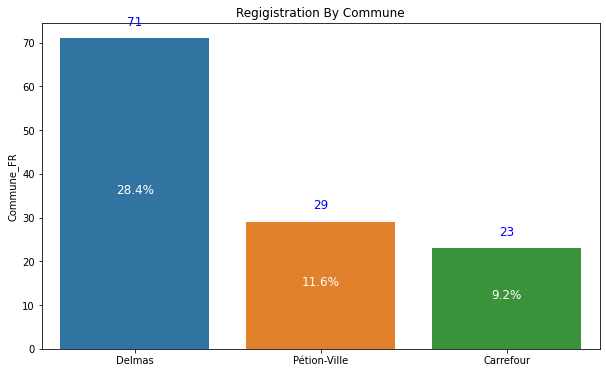

In [69]:
# call the function and pass the data to have the graph
graph=generate_barchart(data=total_commune2,title="Regigistration By Commune",abs_value="Commune_FR",rel_value="frequence")


In [102]:
# call the function of pivot and pass the data gender
commune_data= pivot ("gender")
# calculate the commune data frequencies
commune_data["frequence"]=commune_data["female"]/(commune_data["female"]+commune_data["male"])                                            

In [40]:
# display the shape of commune data
commune_data.shape

(35, 3)

In [41]:
# to have the frequencies of gender in a data frame
prob_gender = df_result6.gender.value_counts(normalize=True).to_frame()
# Rename the gender column in percent
prob_gender.rename(columns={"gender":"Percent"},inplace=True)
# display the data frame of prob gender
prob_gender

,Percent
male,0.812
female,0.188


In [42]:
# to count the values of gender in put them in a frame
gender_total = df_result6.gender.value_counts(normalize=False).to_frame()
# Rename the gender column by totaal and persist on the change
gender_total.rename(columns={"gender": "Total"},inplace=True)
#display gender total dataframe
gender_total

,Total
male,203
female,47


In [43]:
# concat gender result and gender total dataframe on the line
gender_result = pd.concat([prob_gender,gender_total],axis =1)
gender_result#.reset_index()

,Percent,Total
male,0.812,203
female,0.188,47


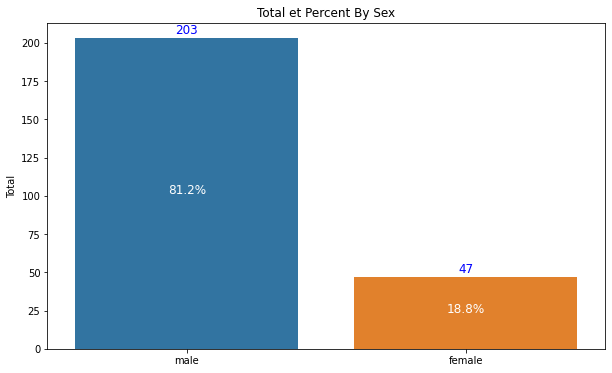

In [44]:
# call the generate barchert function to display the graph by sex
generate_barchart(data=gender_result,title="Total et Percent By Sex",abs_value="Total",rel_value="Percent")


## Data Analysis Multivariate

How many applications must be made to select 25% women for each on average


In [46]:
#Probability to take one women on the total registered woman
prob_1_women= 4/gender_total.loc["female"]
#display prob_1-woman
prob_1_women
# probality to take one woman on the total gender registered
prob_registrated_women= gender_total.loc["female"]/ (gender_total.loc["female"]+gender_total.loc["male"])
# multiply the two probablity
result_women=prob_1_women*prob_registrated_women
# divide the target by the result_woman probability to find the quantity of applicants 
result_women_final= 25/result_women
#display the final result
result_women_final

Total    1562.5
dtype: float64

In [47]:
# call the pivot function on gender, internet_at_home, computer_at_home and education level
pv_gender=pivot("gender")
pv_gender.head()
pv_internet =pivot("internet_at_home")
pv_internet.head()
pv_computer=pivot("have_computer_home")
pv_computer.head()
pv_education=pivot("education_level")
pv_education.head()

education_level,Bachelors (bacc +4),"Doctorate (PhD, MD, JD)",High School (16 years),Masters,Other,unknown
Commune_FR,,,,,,
Aquin,1.0,0.0,0.0,0.0,0.0,0.0
Cap-Haïtien,4.0,0.0,0.0,0.0,1.0,0.0
Caracol,1.0,0.0,0.0,0.0,0.0,0.0
Carrefour,17.0,0.0,3.0,1.0,2.0,0.0
Cité Soleil,1.0,0.0,0.0,0.0,2.0,0.0


In [96]:
# rename the yes columns by have computer or internet and the no column by dont have computer or internet
pv_computer= pv_computer.rename(columns={"Yes":"have_computer","No":"dont_have_computer"})
pv_internet=pv_internet.rename(columns={"Yes":"have_internet","No":"dont_have_internet"})
# concat the the pv_gender, education leveel and so one on the line
df_concat= pd.concat([pv_gender, pv_education, pv_internet, pv_computer], axis=1)
# display the three columns mentionned
df_concat.loc[["Delmas","Pétion-Ville","Carrefour"]]

,female,male,Bachelors (bacc +4),"Doctorate (PhD, MD, JD)",High School (16 years),Masters,Other,unknown,dont_have_internet,have_internet,unknown,dont_have_computer,have_computer,unknown
Commune_FR,,,,,,,,,,,,,,
Delmas,12.0,59.0,41.0,1.0,8.0,5.0,16.0,0.0,10.0,61.0,0.0,5.0,66.0,0.0
Pétion-Ville,4.0,25.0,20.0,0.0,3.0,1.0,5.0,0.0,3.0,25.0,1.0,4.0,25.0,0.0
Carrefour,6.0,17.0,17.0,0.0,3.0,1.0,2.0,0.0,5.0,18.0,0.0,2.0,21.0,0.0


What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection


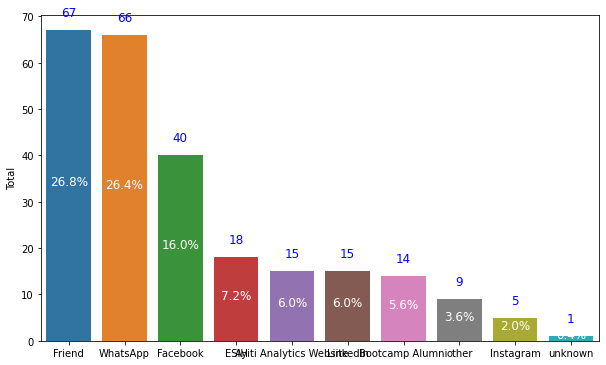

,Total,Percent
Friend,67,0.268
WhatsApp,66,0.264
Facebook,40,0.160
ESIH,18,0.072
Ayiti Analytics Website,15,0.060
LinkedIn,15,0.060
Bootcamp Alumni,14,0.056
other,9,0.036
Instagram,5,0.020
unknown,1,0.004


In [49]:
#call the graf function to do the graphe on hear aa 1 colums on how the registered hear about ayiti analytics
graf(data=df_result6,col="hear_AA_1",show_plot=True,figsize=(4,4))

What is the average number of university students who should participate in this program

In [50]:
# give the percent of education level in a frame
education_percent = df_result6.education_level.value_counts(normalize=True).to_frame()
# display education percent
education_percent
# count the number of the education level column
education_total = df_result6.education_level.value_counts(normalize=False).to_frame()
# display education total
education_total
# rename the education level into total and percent
education_total.rename(columns={"education_level": "Total"},inplace=True)
education_percent.rename(columns={"education_level": "percent"},inplace=True)
# concat education total and education percent on line
education_result = pd.concat ([education_total,education_percent],axis =1)
# display education result
education_result


,Total,percent
Bachelors (bacc +4),148,0.592
Other,51,0.204
High School (16 years),33,0.132
Masters,14,0.056
unknown,3,0.012
"Doctorate (PhD, MD, JD)",1,0.004


In [51]:
# to calculate the frequencies of the sum of the number of bachelor, master and doctorate degree
fekans=((df_result6[['education_level']]=="Bachelors (bacc +4)").sum() + (df_result6[['education_level']]=="Masters").sum() + (df_result6[['education_level']]=="Doctorate (PhD, MD, JD)").sum())/df_result6.shape[0]
# return the frekans result multiply by 4.5 
np.round(fekans*df_result6.shape[0]*4.5,0)

education_level    734.0
dtype: float64

In [52]:
# call the pivot function on education level
pv_education=pivot("education_level")
# dispalay the two lines of pv_education
pv_education.head(2)
# do the sum of pv education value in a frame
pv_education.sum().to_frame()


,0
education_level,
Bachelors (bacc +4),148.0
"Doctorate (PhD, MD, JD)",1.0
High School (16 years),33.0
Masters,14.0
Other,51.0
unknown,3.0


In [53]:
# to find the average of university student
((df_result6[['education_level']]=="Bachelors (bacc +4)").sum() + (df_result6[['education_level']]=="Masters").sum() + (df_result6[['education_level']]=="Doctorate (PhD, MD, JD)	").sum())/df_result6.shape[0]


education_level    0.648
dtype: float64

In [54]:
#add male colum to df_result6 and apply the lambda function to put one if its a male and zero for the female
df_result6["male"] = df_result6["gender"].apply(lambda x: 1 if x == "male" else 0)


In [55]:
# add a female column to df_result6 and apply lambda function to put one for a female and zero for a male
df_result6["female"] =df_result6["gender"].apply(lambda x: 1 if x=="female" else 0)

What will be the average number of applications per week that we could have

In [56]:
# do a group by registration date to find the number of female and male applicant by week
registration_data =df_result6[["Registration_date","quest_id", "female","male"]].groupby(pd.Grouper(key="Registration_date",freq='7D')).sum()
registration_data

,female,male
Registration_date,,
2021-02-14,28,108
2021-02-21,13,41
2021-02-28,3,26
2021-03-07,3,26
2021-03-14,0,2


In [57]:
# add a sum column and do the the sum of male and female column
registration_data['sum']=registration_data['male']+registration_data['female']
#display the registration data head 
registration_data.head()
#add a colums of frequenceies , and calculate it
registration_data['frequencies']=registration_data['sum']/df_result6.shape[0]
#display the registration data five lines
registration_data.head()
# registration_data_mean=(registration_data['sum'].sum())/registration_data.shape[0]
# registration_data_mean
#prob_category(data=registration,col="frequencies",show_plot=True,figsize= (3,2), title="Repartition des...")


,female,male,sum,frequencies
Registration_date,,,,
2021-02-14,28,108,136,0.544
2021-02-21,13,41,54,0.216
2021-02-28,3,26,29,0.116
2021-03-07,3,26,29,0.116
2021-03-14,0,2,2,0.008


How many weeks should we extend the application process to select 60 students per commune?


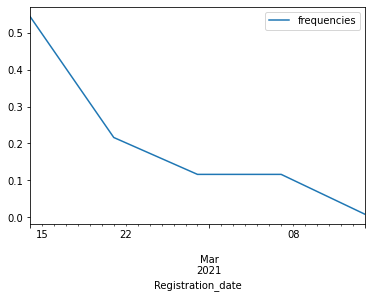

In [58]:
#do the graph registration_data for the all lines and third columm
registration_data.iloc[:,[3]].plot()

when we look at the trend, we see that the frequency of registration is constantly decreasing. Therefore, we do not believe that extending the weeks will increase the number of registrations unless you change your marketing policy.

If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time

In [59]:
#take the column of have internet in pv_internet in a frame
int_home=pv_internet["have_internet"].to_frame()
#calculate the percet of int_home dta frame
int_home_percent = int_home/df_result6.shape[0]
# assignate to int home 1 a sort value function ascending false
int_home1=int_home.sort_values(by="have_internet", ascending=False)
# do a sort value to find the number in order false
int_home_percent1=int_home_percent.sort_values(by="have_internet", ascending=False)
# rename the name columns
int_home1.rename(columns={"have_internet": "internet_total"},inplace=True)
# rename the column
int_home_percent1.rename(columns={"have_internet": "internet_percent"},inplace=True)
# concat int home 1 and int home percent 1
int_result= pd.concat([int_home1,int_home_percent1], axis=1)
# display three columns in int result
int_result.loc[["Delmas","Pétion-Ville","Carrefour"]]


,internet_total,internet_percent
Commune_FR,,
Delmas,61.0,0.244
Pétion-Ville,25.0,0.100
Carrefour,18.0,0.072


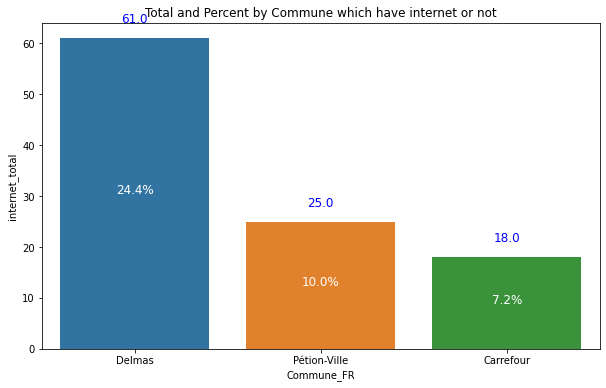

In [60]:
# call the generate barchat function to display the graph for three columns
generate_barchart(data=int_result.loc[["Delmas","Pétion-Ville","Carrefour"]],title="Total and Percent by Commune which have internet or not",abs_value="internet_total",rel_value="internet_percent")


In [61]:
#take the column of have computer in pv_internet in a frame
computer=pv_computer["have_computer"].to_frame()
#calculate the percent of computer percent  
computer_percent = computer/df_result6.shape[0]
# assignate to computer1 a sort value function ascending false
computer1=computer.sort_values(by="have_computer", ascending=False)
# do a sort value to find the number in order false
computer_percent1=computer_percent.sort_values(by="have_computer", ascending=False)
# rename the name columns
computer1.rename(columns={"have_computer": "computer_total"},inplace=True)
# rename the columns
computer_percent1.rename(columns={"have_computer": "computer_percent"},inplace=True)
# concat computer1 and computer_percent1
computer_result= pd.concat([computer1,computer_percent1], axis=1)
# display three columns in computer_result
computer_result.loc[["Delmas","Pétion-Ville","Carrefour"]]

,computer_total,computer_percent
Commune_FR,,
Delmas,66.0,0.264
Pétion-Ville,25.0,0.100
Carrefour,21.0,0.084


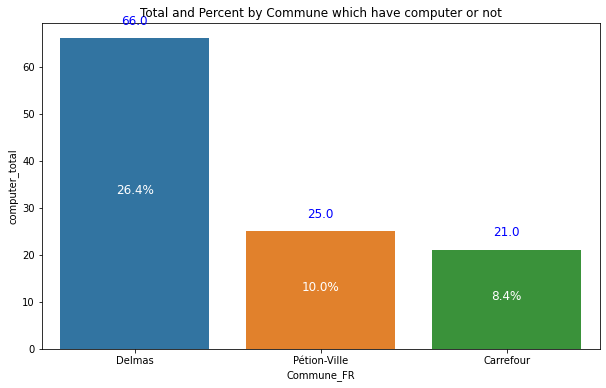

In [62]:
# call the generate barchert function to display the graph by commune wich have computer or not
generate_barchart(data=computer_result.loc[["Delmas","Pétion-Ville","Carrefour"]],title="Total and Percent by Commune which have computer or not",abs_value="computer_total",rel_value="computer_percent")


In [63]:
# merge int result and computer result dataframe
comp_int= pd.merge(left=int_result,right=computer_result, how="left", on="Commune_FR")
# assignate to compte final three columns selected
compte_final=comp_int.loc[["Delmas","Pétion-Ville","Carrefour"]]
#display compte final
compte_final

,internet_total,internet_percent,computer_total,computer_percent
Commune_FR,,,,
Delmas,61.0,0.244,66.0,0.264
Pétion-Ville,25.0,0.100,25.0,0.100
Carrefour,18.0,0.072,21.0,0.084


In [64]:
#import listed colormap from matplolib library
from matplotlib.colors import ListedColormap
# ne_n_computer receive the pivot function on internet_at home
net_n_computer =pivot("internet_at_home")

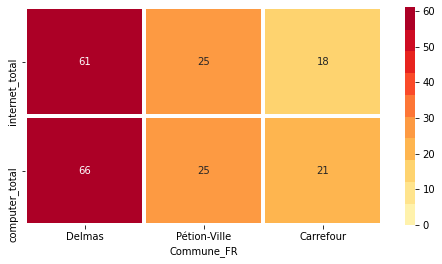

In [65]:
plt.figure(figsize=(8,4))
#We have done a heat map so that we could see the commune in which the number of applicants who have internet at home is high
sns.heatmap(data=compte_final[["internet_total", "computer_total"]].T,cmap =ListedColormap(sns.color_palette("YlOrRd", 10)),vmin =net_n_computer.min().min(),vmax =net_n_computer.max().max(),annot=True,linecolor="white",linewidths=3)

What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

In [66]:
# do a pivot_table on quest id by gender and the channels
canal_data_1= pd.pivot_table(df_result6, values="quest_id",index="gender",columns="hear_AA_1",aggfunc="count")
canal_data_1

hear_AA_1,Ayiti Analytics Website,Bootcamp Alumni,ESIH,Facebook,Friend,Instagram,LinkedIn,WhatsApp,other,unknown
gender,,,,,,,,,,
female,4.0,8.0,5.0,6.0,11.0,1.0,1.0,9.0,2.0,NaN
male,11.0,6.0,13.0,34.0,56.0,4.0,14.0,57.0,7.0,1.0


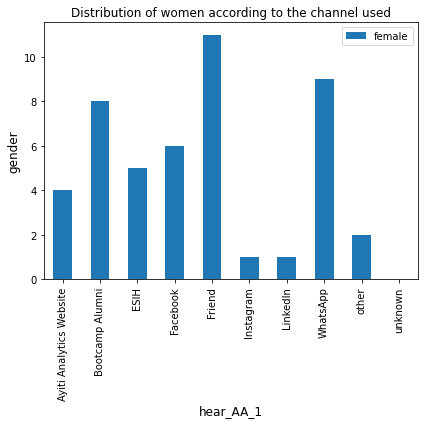

In [103]:
#generate_barchart(data=gender_result,title="Total et Percent By Sex",abs_value="Total",rel_value="Percent")
figure_1 = canal_data_1.iloc[0,:].plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = figure_1.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(6,6)
# Change the axes labels
figure_1.set_xlabel("hear_AA_1",fontsize=12)
figure_1.set_ylabel("gender",fontsize=12)
figure_1.set_title("Distribution of women according to the channel used",fontsize=12)
# to put a font size to the graph
plt.rcParams.update({'font.size': 10})
#add legend
figure_1.legend()
plt.tight_layout()
#plt.show()
figure_1